Importing our libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

Loading our data

In [15]:
df = pd.read_csv('Mall_Customers.csv')

Displaying info about our data

In [16]:
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("Dataset info:")
print(df.info())

Dataset shape: (200, 5)

First few rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
N

Data preprocessing

In [17]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("Features selected for clustering:")
print(features.head())
print("\nFeatures statistics:")
print(features.describe())


Features selected for clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Features statistics:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


Before creating our clusters, we must **normalize** the data first by using the *StandardScaler* class

In [18]:
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

features_normalized_df = pd.DataFrame(features_normalized, columns = ['Annual Income (normalized)', 'Spending Score (normalized)'])

print("Normalized Features:")
print(features_normalized_df)
print("\nNormalized features statistics:")
print(features_normalized_df.describe())

Normalized Features:
     Annual Income (normalized)  Spending Score (normalized)
0                     -1.738999                    -0.434801
1                     -1.738999                     1.195704
2                     -1.700830                    -1.715913
3                     -1.700830                     1.040418
4                     -1.662660                    -0.395980
..                          ...                          ...
195                    2.268791                     1.118061
196                    2.497807                    -0.861839
197                    2.497807                     0.923953
198                    2.917671                    -1.250054
199                    2.917671                     1.273347

[200 rows x 2 columns]

Normalized features statistics:
       Annual Income (normalized)  Spending Score (normalized)
count                2.000000e+02                 2.000000e+02
mean                -2.131628e-16                -1.465494e-16
s

We will now determine the optimal number of clusters we need for our graph via the Elbow Method

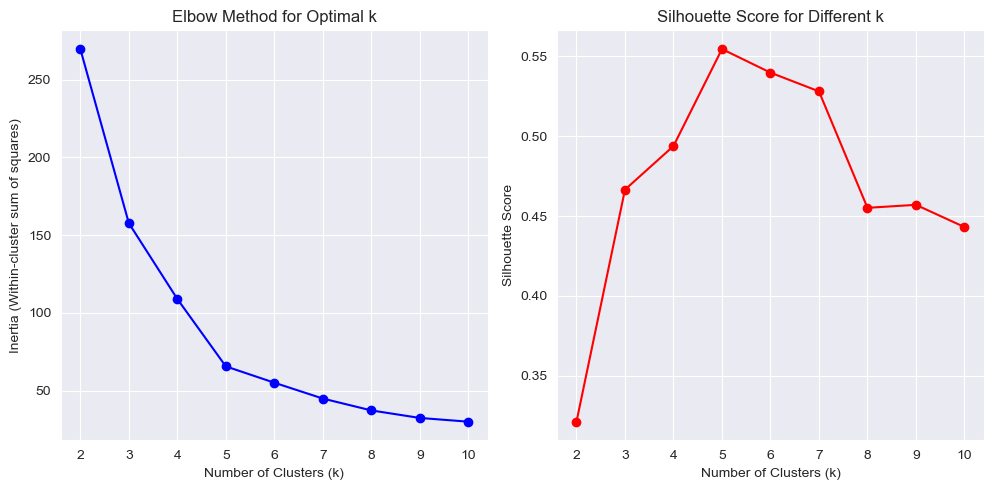

k = 2: Silhouette Score = 0.321
k = 3: Silhouette Score = 0.467
k = 4: Silhouette Score = 0.494
k = 5: Silhouette Score = 0.555
k = 6: Silhouette Score = 0.540
k = 7: Silhouette Score = 0.528
k = 8: Silhouette Score = 0.455
k = 9: Silhouette Score = 0.457
k = 10: Silhouette Score = 0.443


In [19]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(features_normalized)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_normalized, kmeans.labels_))

plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)

plt.tight_layout()
plt.show()

for k, score in zip(k_range, silhouette_scores):
    print(f"k = {k}: Silhouette Score = {score:.3f}")


Next, we figure the optimal number of clusters for our graph

In [20]:
optimal_k = 5 
# 5 is the most common and therefore safest number to use as the optimal number of clusters
kmeans = KMeans(n_clusters = optimal_k, random_state = 42, n_init = 10)
cluster_labels = kmeans.fit_predict(features_normalized)

df['Cluster'] = cluster_labels
features_normalized_df['Cluster'] = cluster_labels

print(f"K-means clustering complete with k = {optimal_k}")
print(f"Silhouette Score: {silhouette_score(features_normalized, cluster_labels):.3f}")

print("\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

K-means clustering complete with k = 5
Silhouette Score: 0.555

Cluster distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


It is time to create the graph! This is the graph with **normalized** data. 
We will also plot with the original data as our control group


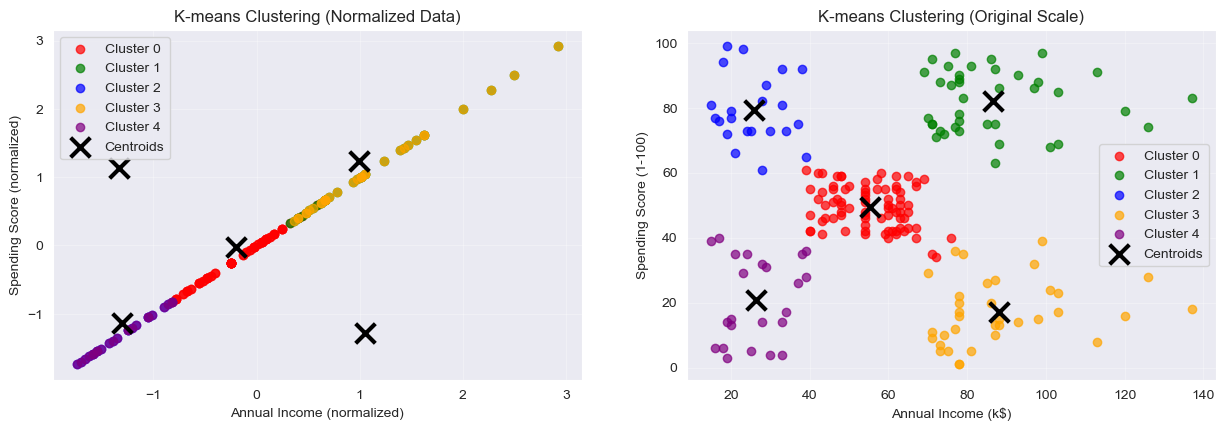

In [21]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
colors = ['red', 'green', 'blue', 'orange', 'purple']

for i in range(optimal_k):
    cluster_data = features_normalized_df[features_normalized_df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (normalized)'], cluster_data['Annual Income (normalized)'], c = colors[i], label = f'Cluster {i}', alpha = 0.7)
 
centers_normalized = kmeans.cluster_centers_
plt.scatter(centers_normalized[:, 0], centers_normalized[:, 1], c = 'black', marker  = 'x', s = 200, linewidths = 3, label = 'Centroids')

plt.xlabel('Annual Income (normalized)')
plt.ylabel('Spending Score (normalized)')
plt.title('K-means Clustering (Normalized Data)')
plt.legend()
plt.grid(True, alpha = 0.3)

plt.subplot(2, 2, 2)

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c = colors[i], label = f'Cluster {i}', alpha = 0.7)

centers_original = scaler.inverse_transform(centers_normalized)
plt.scatter(centers_original[:, 0], centers_original[:, 1], c = 'black', marker  = 'x', s = 200, linewidths = 3, label = 'Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering (Original Scale)')
plt.legend()
plt.grid(True, alpha = 0.3)


Showing Income and Spending Score distributions

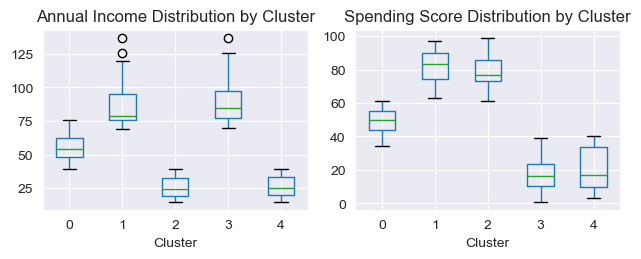

In [22]:
plt.subplot(2, 2, 3)

df.boxplot(column = 'Annual Income (k$)', by = 'Cluster', ax = plt.gca())
plt.title('Annual Income Distribution by Cluster')
plt.suptitle('')

plt.subplot(2, 2, 4)

df.boxplot(column = 'Spending Score (1-100)', by = 'Cluster', ax = plt.gca())
plt.title('Spending Score Distribution by Cluster')
plt.suptitle('')

plt.tight_layout()
plt.show()

Analysis on the individual clusters

In [23]:
print("Cluster Analysis:")
print("=" * 50)

cluster_analysis = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)

cluster_analysis.columns = ['Income_Mean', 'Income_Std', 'Income_Min', 'Income_Max', 'Spending_Mean', 'Spending_Std', 'Spending_Min', 'Spending_Max', 'Customer_Count']

print(cluster_analysis)
print("\nIncome * 1000")


Cluster Analysis:
         Income_Mean  Income_Std  Income_Min  Income_Max  Spending_Mean  \
Cluster                                                                   
0              55.30        8.99          39          76          49.52   
1              86.54       16.31          69         137          82.13   
2              25.73        7.57          15          39          79.36   
3              88.20       16.40          70         137          17.11   
4              26.30        7.89          15          39          20.91   

         Spending_Std  Spending_Min  Spending_Max  Customer_Count  
Cluster                                                            
0                6.53            34            61              81  
1                9.36            63            97              39  
2               10.50            61            99              22  
3                9.95             1            39              35  
4               13.02             3            4

Interpreting our clusters


In [24]:
print("\nCluster Interpretation:")
print("=" * 50)

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    count = len(cluster_data)

    print(f"\nCluster {i} ({count} customers):")
    print(f"  Average Income: ${avg_income:.1f}k")
    print(f"  Average Spending Score: {avg_spending:.1f}")
    
    if avg_income < 40 and avg_spending < 50:
        interpretation = "Low Income, Low Spending (Careful Customers)"
    elif avg_income < 40 and avg_spending >= 50:
        interpretation = "Low Income, High Spending (Impulsive Customers)"
    elif avg_income >= 70 and avg_spending < 50:
        interpretation = "High Income, Low Spending (Conservative Wealthy Customers)"
    elif avg_income >= 70 and avg_spending >= 50:
        interpretation = "High Income, High Spending (Premium Customers)"
    else:
        interpretation = "Medium Income, Median Spending (Standard Customers)"
    
    print(f"  Interpretation: {interpretation}")



Cluster Interpretation:

Cluster 0 (81 customers):
  Average Income: $55.3k
  Average Spending Score: 49.5
  Interpretation: Medium Income, Median Spending (Standard Customers)

Cluster 1 (39 customers):
  Average Income: $86.5k
  Average Spending Score: 82.1
  Interpretation: High Income, High Spending (Premium Customers)

Cluster 2 (22 customers):
  Average Income: $25.7k
  Average Spending Score: 79.4
  Interpretation: Low Income, High Spending (Impulsive Customers)

Cluster 3 (35 customers):
  Average Income: $88.2k
  Average Spending Score: 17.1
  Interpretation: High Income, Low Spending (Conservative Wealthy Customers)

Cluster 4 (23 customers):
  Average Income: $26.3k
  Average Spending Score: 20.9
  Interpretation: Low Income, Low Spending (Careful Customers)


Our final graph!

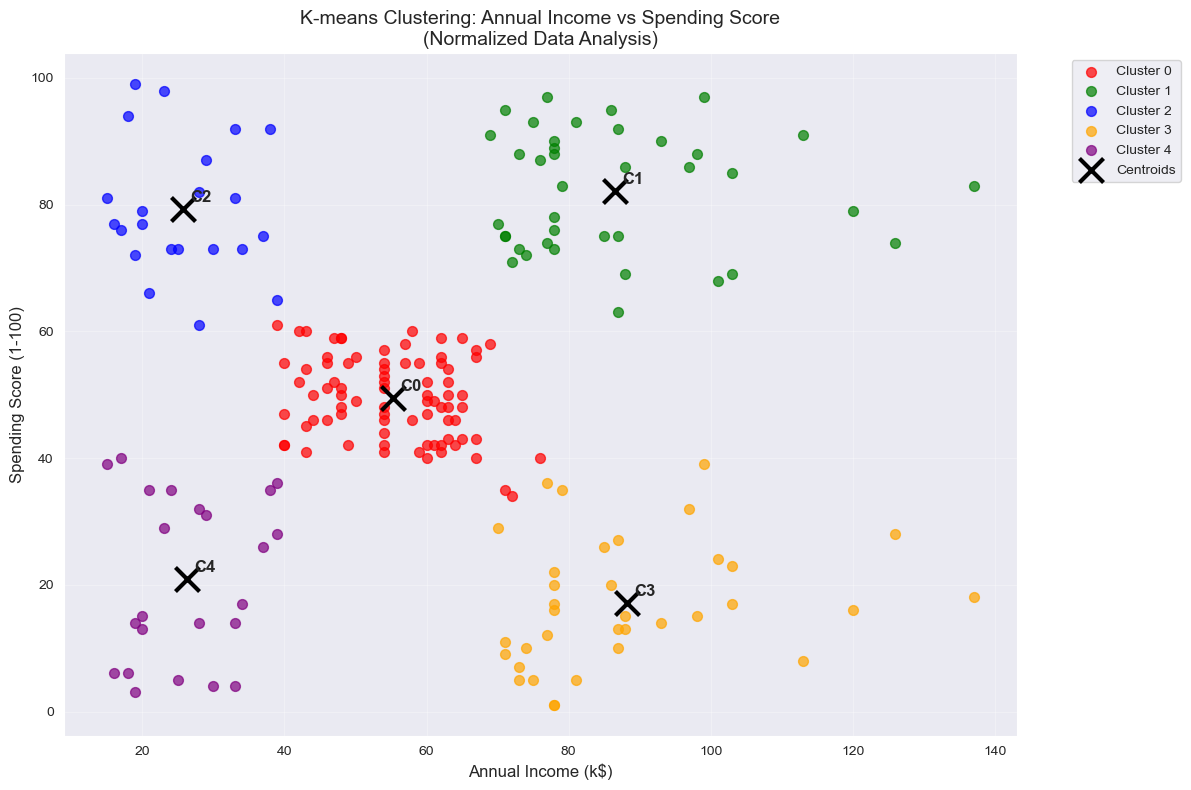

In [25]:
plt.figure(figsize = (12, 8))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c = colors[i], label = f'Cluster {i}', alpha = 0.7, s = 50)

centers_original = scaler.inverse_transform(centers_normalized)
plt.scatter(centers_original[:, 0], centers_original[:, 1], c = 'black', marker = 'x', s = 300, linewidths = 3, label = 'Centroids')

for i, (x, y) in enumerate(centers_original):
    plt.annotate(f'C{i}', (x, y), xytext = (5, 5), textcoords = 'offset points', fontweight = 'bold', fontsize = 12)

plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.title('K-means Clustering: Annual Income vs Spending Score\n(Normalized Data Analysis)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()
